In [1]:
# import dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
# setup SQL database connection
Base = automap_base()
engine = create_engine('sqlite:///../data/fbdata.sqlite')
Base.metadata.create_all(engine)
Base.prepare(engine, reflect=True)
session = Session(engine)

In [3]:
# get modelTrainTest dataframe
modelTrainValidate = pd.read_sql_query("SELECT * FROM modelTrainValidate", con=engine)
featuresDF = modelTrainValidate[['height', 'weight', 'lbsPerIn', '40yard',\
       'vertleap', 'broadjump', 'shuttle', '3cone', 'games','plays', 'playsPerGame', 'tdPerInt',\
       'rushAvg', 'ydsFromScrimAvg', 'compPct', 'ydsPerAtt', 'adjYdsPerAtt',\
       'effRate', 'success']]
featuresDF

,height,weight,lbsPerIn,40yard,vertleap,broadjump,shuttle,3cone,games,plays,playsPerGame,tdPerInt,rushAvg,ydsFromScrimAvg,compPct,ydsPerAtt,adjYdsPerAtt,effRate,success
0,76.300,213.0,2.791612,4.7500,30.460803,108.912046,4.354681,7.20592,45.0,126,2.800000,1.920000,-2.6,-2.4,61.3,9.0,8.7,152.9,1.0
1,75.000,212.0,2.826667,4.9500,28.000000,108.000000,4.510000,7.20592,32.0,141,4.406250,0.947368,-3.4,-3.4,56.8,7.0,6.1,120.2,0.0
2,73.400,190.0,2.588556,4.7400,30.500000,117.000000,4.350000,7.20592,36.0,183,5.083333,1.076923,0.9,1.0,55.2,6.6,5.7,116.4,1.0
3,74.300,203.0,2.732167,4.8776,30.460803,108.912046,4.354681,7.20592,49.0,218,4.448980,1.409091,1.4,1.4,62.4,8.8,8.2,145.6,1.0
4,75.000,191.0,2.546667,4.8200,29.500000,111.000000,4.450000,7.20592,33.0,195,5.909091,0.970588,2.2,2.2,51.9,7.7,6.4,122.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,76.875,224.0,2.913821,4.8776,30.460803,108.912046,4.354681,7.20592,30.0,83,2.766667,2.333333,-3.8,-3.8,61.8,8.8,8.8,148.4,0.0
246,73.625,212.0,2.879457,4.9900,28.000000,102.000000,4.500000,7.55000,25.0,90,3.600000,3.000000,-1.5,-1.5,68.1,8.9,9.3,161.7,0.0
247,74.625,218.0,2.921273,5.0000,28.000000,99.000000,4.250000,7.07000,49.0,192,3.918367,2.190476,1.7,1.9,63.0,6.9,6.9,134.7,0.0
248,72.625,222.0,3.056799,4.8400,30.500000,104.000000,4.230000,7.33000,47.0,505,10.744681,2.743590,2.3,2.3,64.3,8.5,8.8,155.2,0.0


In [4]:
# look at some correlation
corr = featuresDF.corr()
corr.style.background_gradient(cmap='coolwarm')

,height,weight,lbsPerIn,40yard,vertleap,broadjump,shuttle,3cone,games,plays,playsPerGame,tdPerInt,rushAvg,ydsFromScrimAvg,compPct,ydsPerAtt,adjYdsPerAtt,effRate,success
height,1.000000,0.604867,0.305539,0.218399,-0.185253,-0.095436,0.160518,0.074294,-0.047125,-0.280520,-0.267569,0.072422,-0.231856,-0.222582,0.053312,-0.154320,-0.067225,-0.047108,0.101458
weight,0.604867,1.000000,0.942829,-0.000785,0.056326,0.074925,0.040312,-0.016558,-0.054361,-0.036775,-0.015930,0.226347,0.052464,0.051276,0.094885,-0.007308,0.118378,0.100526,0.047583
lbsPerIn,0.305539,0.942829,1.000000,-0.092791,0.144682,0.128367,-0.020034,-0.052507,-0.047242,0.071856,0.091368,0.239788,0.159374,0.154156,0.091031,0.051301,0.166304,0.136987,0.013517
40yard,0.218399,-0.000785,-0.092791,1.000000,-0.716129,-0.649203,0.375843,0.354660,0.022033,-0.457710,-0.513293,-0.234761,-0.569485,-0.568388,-0.047941,-0.225757,-0.249393,-0.196181,-0.206136
vertleap,-0.185253,0.056326,0.144682,-0.716129,1.000000,0.735835,-0.471894,-0.321747,-0.095861,0.358228,0.432627,0.219563,0.464458,0.454257,0.058184,0.172964,0.199814,0.163275,0.189690
broadjump,-0.095436,0.074925,0.128367,-0.649203,0.735835,1.000000,-0.387457,-0.351824,-0.049096,0.366255,0.440222,0.178675,0.462043,0.450492,0.089645,0.145532,0.177261,0.151620,0.191777
shuttle,0.160518,0.040312,-0.020034,0.375843,-0.471894,-0.387457,1.000000,0.445089,0.047497,-0.211098,-0.262660,-0.156602,-0.276860,-0.273662,-0.065789,-0.108776,-0.131546,-0.114369,-0.011533
3cone,0.074294,-0.016558,-0.052507,0.354660,-0.321747,-0.351824,0.445089,1.000000,-0.087330,-0.324762,-0.332620,-0.150173,-0.382403,-0.376535,-0.179690,-0.112061,-0.140910,-0.151977,-0.044146
games,-0.047125,-0.054361,-0.047242,0.022033,-0.095861,-0.049096,0.047497,-0.087330,1.000000,0.387028,0.028603,0.022416,-0.022740,-0.010253,0.162099,0.028221,0.079487,0.103685,0.014698
plays,-0.280520,-0.036775,0.071856,-0.457710,0.358228,0.366255,-0.211098,-0.324762,0.387028,1.000000,0.903204,0.125626,0.631345,0.618292,0.100856,0.130703,0.153012,0.136345,0.079040


(array([ 2.,  4., 18., 19., 35., 96., 40., 15.,  9., 12.]),
 array([21.5 , 23.25, 25.  , 26.75, 28.5 , 30.25, 32.  , 33.75, 35.5 ,
        37.25, 39.  ]),
 <a list of 10 Patch objects>)

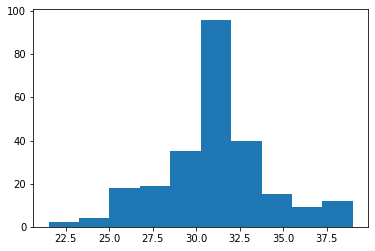

In [5]:
#scatter plot(s)
plt.hist(featuresDF['vertleap'])

In [6]:
# narrow features
featuresNarrow = featuresDF[['40yard', 'vertleap', 'broadjump','rushAvg',\
                             'adjYdsPerAtt','effRate', 'success']]

In [7]:
# look at some correlation
corrnarrow = featuresNarrow.corr()
corrnarrow.style.background_gradient(cmap='coolwarm')

,40yard,vertleap,broadjump,rushAvg,adjYdsPerAtt,effRate,success
40yard,1.000000,-0.716129,-0.649203,-0.569485,-0.249393,-0.196181,-0.206136
vertleap,-0.716129,1.000000,0.735835,0.464458,0.199814,0.163275,0.189690
broadjump,-0.649203,0.735835,1.000000,0.462043,0.177261,0.151620,0.191777
rushAvg,-0.569485,0.464458,0.462043,1.000000,0.203673,0.169429,0.201471
adjYdsPerAtt,-0.249393,0.199814,0.177261,0.203673,1.000000,0.966007,0.172873
effRate,-0.196181,0.163275,0.151620,0.169429,0.966007,1.000000,0.172079
success,-0.206136,0.189690,0.191777,0.201471,0.172873,0.172079,1.000000
